In [4]:
# One hot encoding using numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

# Loading training data


In [7]:
train_df = pd.read_csv("data/Train.csv")
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [9]:
train_df.shape

(39209, 8)

In [15]:
# Loading input images
train_image = []
for i in tqdm(range(train_df.shape[0])):
    img = image.load_img("data/"+train_df['Path'][i], target_size=(28, 28, 3))
    img = image.img_to_array(img)
    img = img/255 # rescale the image to 
    train_image.append(img)
    
X = np.array(train_image)

100%|██████████| 39209/39209 [00:09<00:00, 4003.24it/s]


In [16]:
# Loading the target variables then convert to one hot encoding
y = train_df["ClassId"].values
y = to_categorical(y)

data/Train/5/00005_00050_00020.png


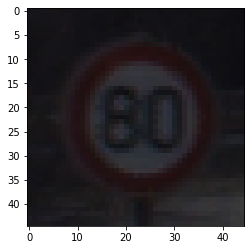

In [17]:
# Show sample image
img_num = 9950
img = plt.imread("data/"+train_df['Path'][img_num])
plt.imshow(img)
print("data/"+train_df['Path'][img_num])

In [19]:
# Validation Set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=7, test_size=0.2)

In [20]:
# Keras Model
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [22]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 3)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(43, activation="softmax"))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
981/981 [==============================] - 31s 32ms/step - loss: 0.7969 - accuracy: 0.7935 - val_loss: 0.2076 - val_accuracy: 0.9449
Epoch 2/10
981/981 [==============================] - 34s 35ms/step - loss: 0.1203 - accuracy: 0.9682 - val_loss: 0.1238 - val_accuracy: 0.9635
Epoch 3/10
981/981 [==============================] - 34s 34ms/step - loss: 0.0630 - accuracy: 0.9824 - val_loss: 0.0955 - val_accuracy: 0.9759
Epoch 4/10
981/981 [==============================] - 34s 35ms/step - loss: 0.0430 - accuracy: 0.9875 - val_loss: 0.0841 - val_accuracy: 0.9778
Epoch 5/10
981/981 [==============================] - 34s 35ms/step - loss: 0.0265 - accuracy: 0.9923 - val_loss: 0.0701 - val_accuracy: 0.9821
Epoch 6/10
981/981 [==============================] - 35s 35ms/step - loss: 0.0216 - accuracy: 0.9942 - val_loss: 0.0849 - val_accuracy: 0.9772
Epoch 7/10
981/981 [==============================] - 36s 36ms/step - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0.0692 - val_accuracy:

## Test Data

In [25]:
test_df = pd.read_csv("data/Test.csv")
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


## Test Dataset

In [27]:
test_image = []

for i in tqdm(range(test_df.shape[0])):
    img = image.load_img("data/"+test_df['Path'][i], target_size=(28, 28, 3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
    
X_test = np.array(test_image)

100%|██████████| 12630/12630 [00:03<00:00, 4037.20it/s]


In [29]:
test_paths = test_df['Path']
y_test = test_df['ClassId'].values
y_test = to_categorical(y_test)
model.fit(X, y, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1226/1226 [==============================] - 35s 28ms/step - loss: 0.0232 - accuracy: 0.9936 - val_loss: 0.2543 - val_accuracy: 0.9493
Epoch 2/10
1226/1226 [==============================] - 39s 32ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.2528 - val_accuracy: 0.9485
Epoch 3/10
1226/1226 [==============================] - 40s 33ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.3627 - val_accuracy: 0.9416
Epoch 4/10
1226/1226 [==============================] - 43s 35ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.3718 - val_accuracy: 0.9462
Epoch 5/10
1226/1226 [==============================] - 45s 37ms/step - loss: 0.0103 - accuracy: 0.9971 - val_loss: 0.3078 - val_accuracy: 0.9423
Epoch 6/10
1226/1226 [==============================] - 44s 36ms/step - loss: 0.0079 - accuracy: 0.9979 - val_loss: 0.3418 - val_accuracy: 0.9443
Epoch 7/10
1226/1226 [==============================] - 44s 36ms/step - loss: 0.0080 - accuracy: 0.9979 - val_loss: 0.3784 -

In [30]:
prediction = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
pred_df = pd.DataFrame()
pred_df['Img_Path'] = test_paths
pred_df['Prediction'] = prediction
pred_df.to_csv("data/pred.csv", header=True, index=False)

The actual Class is : 4
The predicted class is : 4


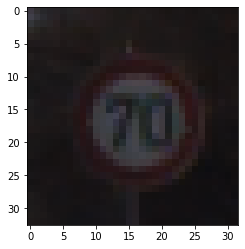

In [37]:
pred = pd.read_csv("data/pred.csv")
img_num = 20
img = plt.imread("data/"+test_df['Path'][img_num])
plt.imshow(img)
print("The actual Class is :", test_df["ClassId"][img_num])
print("The predicted class is :", pred["Prediction"][img_num])